## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. For example, we built a linear model to predict the Life Satisfaction Index given GDP per capita. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
# import iris dataset from sklearn
from sklearn import datasets
iris = datasets.load_iris()

# read official documentation of load_iris() to understand 
# the loaded dataset
iris_data = iris['data']
iris_data[:10, :]
iris_target = iris['target']
print('iris_target:', iris_target)
iris_target_names = iris['target_names']
print('iris_target_names:', iris_target_names)
iris_feature_names = iris['feature_names'] 
print('iris_feature_names:', iris_feature_names)
iris_DESCR = iris['DESCR'] # complete description of data set
print('iris_DESCR:', iris_DESCR)

iris_target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris_target_names: ['setosa' 'versicolor' 'virginica']
iris_feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_DESCR: Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== =====

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


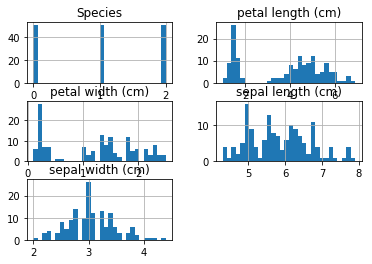

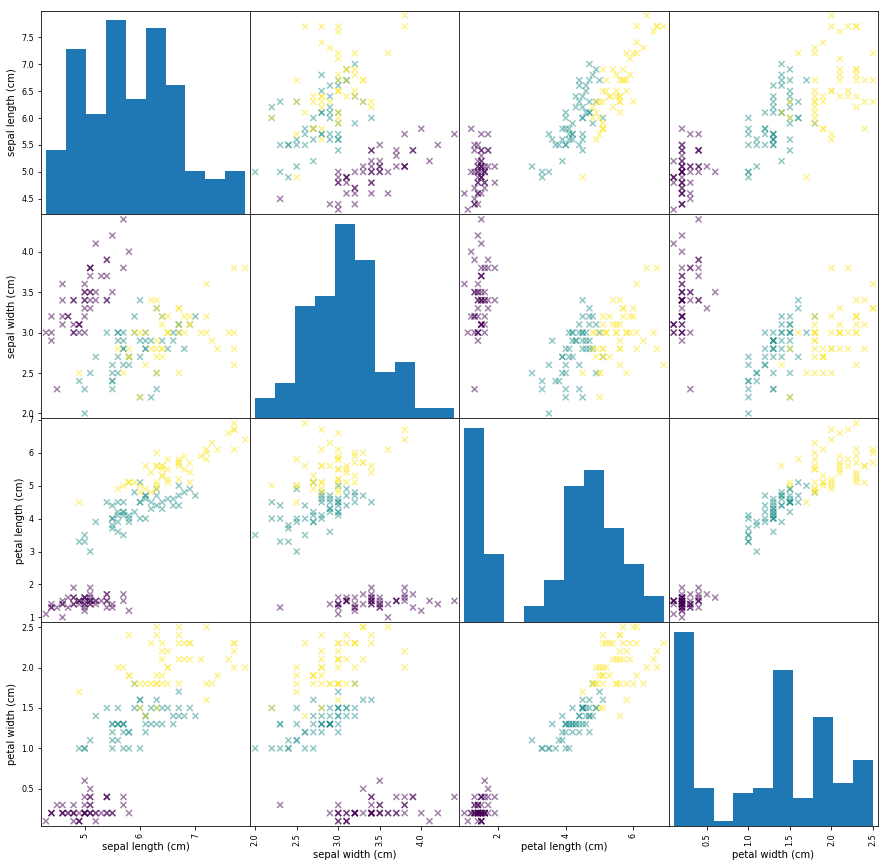

In [3]:
# Visualize the dataset: 
# Use pandas.DataFrame() to load iris data as a data frame, and
# 1. Compute descriptive statistics for each input feature
# 2. plot the distribution of each input feature
# 3. create scatter plot for each pair of features, use three 
#   colors to distinguish the three species.
import pandas as pd
iris_df = pd.DataFrame(data=iris_data, columns=iris_feature_names)
print(iris_df.head())
# add a new column called 'Species'
# iris_df['Species'] = iris_target
iris_df = iris_df.assign(Species=iris_target)
iris_df.head(100)
# Use describe() to generate numerical statistics
iris_df.describe()

# histogram for each individual feature
import matplotlib.pyplot as plt
%matplotlib inline
iris_df.hist(bins=30)
plt.show()

# create a scatter matrix
from pandas.plotting import scatter_matrix
# scatter_matrix(df,figsize=[20,20],marker='x',
# c=df.Survived.apply(lambda x:colors[x]))
scatter_matrix(iris_df[iris_feature_names], figsize=[15, 15], marker='x',\
              c=iris_df['Species'])
plt.show()

In [25]:
# Split the dataset into training_set and test_set, where 
# test_set contains 20% randomly chosen data examples, and
# train_set contains the rest of data examples.

# generate a list from 0 to 149, use numpy.random.shuffle to shuffle the 
# index
import numpy as np
size = len(iris_df.index)
arr = np.arange(size)
#print(arr)
np.random.shuffle(arr)
# print(arr)

# split arr into two sublists: test_indices contains the first 20% values,
# train_indices contains the remaining 80%.
test_ratio = 0.2
test_size = int(size * test_ratio)
test_indices = arr[:test_size]
train_indices = arr[test_size:]
print(test_indices)
print(train_indices)

# create two dataframes: test_set, train_set
# test_set consists of rows in test_indices
# train_set consists of rows in train_indices
test_set = iris_df.iloc[test_indices, :]
train_set = iris_df.iloc[train_indices, :]
train_set.head()


[ 89 112   1  42 145  95 146  28  21  39 140  69  62  40 142 119  12  15
 126  25   3 129   5  31   9  77  41  26  18  99]
[117  29  20  84  19 124  75 107  23 104 143  79  60   4 138  55  91  82
 114 123 141  65  92  88  97 135  44  16  87  47 111  81 103 127 120  67
  85 101  43  45 102  68  30 133  48  11  34  36  98  58 122 109  51  57
 130   7  46  78 144  22   2 128  52 108  71  64 100 137 113  38  66 139
  17 110  61  50  73 132  13 118  32 121  54  14 116 131  33 136  49 147
  53   8  80  74 148  37  63  90  35  56 149   0  24  59 105  86 125  83
  70  10 134  72  93  27 106  94   6 115  76  96]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
117,7.7,3.8,6.7,2.2,2
29,4.7,3.2,1.6,0.2,0
20,5.4,3.4,1.7,0.2,0
84,5.4,3.0,4.5,1.5,1
19,5.1,3.8,1.5,0.3,0


### Let's first apply linear regression

In [26]:
# perform multilinear regression on the training set. 
import sklearn.linear_model

xs = train_set.iloc[:, :4]
ys = train_set.iloc[:, 4]

linearModel = sklearn.linear_model.LinearRegression()
linearModel.fit(xs, ys)

# use LinearRegression.score() to get the coefficient of 
# determination
linearModel.score(xs, ys)

0.9243765556648007

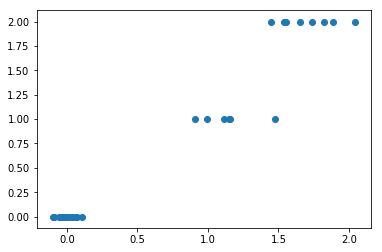

[1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1]
accuracy: 0.966666666667


In [27]:
# apply the linear model to the test set
# show prediction vs. true class on a scatter plot

# use LinearModel.predict() to predict the species in test_set
pred = linearModel.predict(test_set.iloc[:,:4])
# print(pred)
plt.scatter(pred, test_set['Species']) # test_set.iloc[4]
plt.show()

# compute the accuracy of prediction
# decision rule: 
# < 0.5: label 0; 
# between 0.5 and 1.5: label 1;
# > 1.5: label 2.

pred = [0 if x <0.5 else 1 if x < 1.5 else 2 for x in pred]
print(pred)
true_label = test_set['Species'] # test_set.iloc[:,4]
accuracy = sum(true_label == pred)/len(pred)
print('accuracy:', accuracy)

**Problem of the above linear regression approach:**
1. hard to justify the classification rule
2. prediction has no clear meaning
3. label the classes with different values may cause the result to change

**Now let's look at logistic regression model:**

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (1, x_1, ..., x_n)$.
- $\theta = (\theta_0, \theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5


**Discussion**

What is the range of the logistic function? 

Ans: The range is (0,1)

What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}\ge 0.5$? 

Ans: The inner product will be positive if the predicted probability is greater than 0.5; when $\hat{p} = 0.5 the inner product is equal to 0.

What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}< 0.5$?

Ans: The inner product will be negative if the predicted probability is less than 0.5

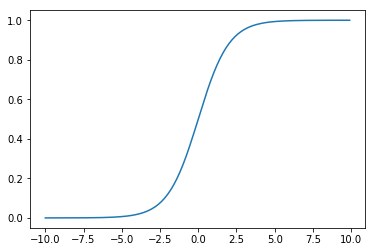

In [28]:
# plot the graph of a logistic function over interval [-10, 10]
import math
t = np.arange(-10,10,0.1)
y = 1/(1+(math.e**-t))
plt.plot(t,y)
plt.show()

### Training and Cost Function

**Cost function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if }y=1,\\
-\log(1-\hat{p}) & \textit{if }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

**Discussion**
1. Why not use the same cost function from linear regression?

Ans: The function will not be convex

2. Verify that $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
3. What does the graph of $y=-\log(\hat{p})$ and $y=-\log(1-\hat{p})$ look like over interval $(0,1)$?
4. Will gradient descent guarantee to converge for $J(\theta)$?

In [29]:
# Train logistic regressin model to identify Iris-Virginica
# make new column 'isVirginica'
train_set = train_set.assign(isVirginica=\
            (train_set['Species'] == 2).astype(np.int))
test_set = test_set.assign(isVirginica=\
            (test_set['Species'] == 2).astype(np.int))
# Show the first 10 rows of the training set.
train_set.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,isVirginica
117,7.7,3.8,6.7,2.2,2,1
29,4.7,3.2,1.6,0.2,0,0
20,5.4,3.4,1.7,0.2,0,0
84,5.4,3.0,4.5,1.5,1,0
19,5.1,3.8,1.5,0.3,0,0
124,6.7,3.3,5.7,2.1,2,1
75,6.6,3.0,4.4,1.4,1,0
107,7.3,2.9,6.3,1.8,2,1
23,5.1,3.3,1.7,0.5,0,0
104,6.5,3.0,5.8,2.2,2,1


In [30]:
# fit the training data to logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set[iris['feature_names']], train_set['isVirginica'])



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Append model predictions to the test_set
test_set = test_set.assign(prediction=log_reg.predict(\
                            test_set[iris['feature_names']]))

# Compute test accuracy
accuracy2 = sum(test_set['prediction']==test_set['isVirginica'])\
/len(test_set)
print('accuracy:', accuracy2)

accuracy: 1.0


### Visualing the decision boundary
To visulize what logistic regression can learn about the Iris dataset, let try two simpler models:

In [32]:
# build a logistic classifier based only on the petal width feature
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(train_set['petal width (cm)'].values.reshape(-1, 1), train_set['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

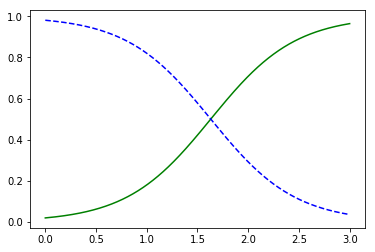

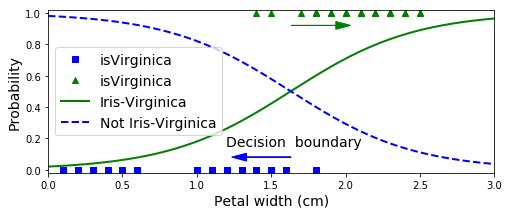

In [33]:
# Let's look at the model's estimated probabilities 
# for flowers with petal widths varying from 0 to 3cm
xs = np.linspace(0, 3, 1000).reshape(-1, 1)
ys = log_reg2.predict_proba(xs)
plt.plot(xs, ys[:, 1], 'g-', label='Iris-Virginica')
plt.plot(xs, ys[:, 0], 'b--', label='Not Iris-Virginica')

X = train_set['petal width (cm)'].values.reshape(-1, 1)
y = train_set['isVirginica']
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg2.predict_proba(X_new)
decision_boundary = xs[y_proba[:, 1] >= 0.5][0]
# plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

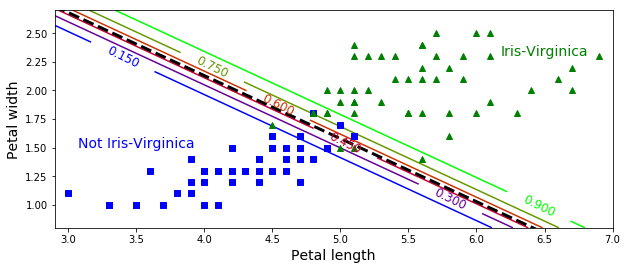

In [34]:
# logistic classifier based on both petal width and petal length
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Logistic Regression for Multiple Classes (Softmax regression)
**model**:

$\hat{p}_k = \frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K\exp(s_i(\textbf{x}))}$.

$s_k(\textbf{x}) = \textbf{x}\cdot\theta_k^T$

- $\hat{p}_k$ is the probability that the instance belongs to class $k$.
- K is the number of classes.
- $\theta_k$ is the coefficient vector associated with class $k$. All these vectors are stored as rows in a parameter matrix $\Theta$.
- The softmax classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Cross entropy cost function**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K
y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ is equal to 1 if the target for the i-th instance is $k$; otherwise, it is equal to 0.


In [35]:
# Use softmax regression to build a classifier for all three 
# classes 
softmax_reg = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs')
softmax_reg.fit(train_set[iris['feature_names']], train_set['Species'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# Append model predictions to the test_set
test_set = test_set.assign(prediction=softmax_reg.predict(\
                            test_set[iris['feature_names']]))

# Compute test accuracy
accuracy3 = sum(test_set['prediction']==test_set['isVirginica'])\
/len(test_set)
print('accuracy:', accuracy3)

accuracy: 0.6


## Homework:

1. Complete this notebook.
2. Add a new cell below, and build a logistic classifier to identify Iris-Setosa based only on its petal width. Divide the dataset randomly into 80% training set and 20% test set, show accuracy on test set.
3. (graduate students) Visualize the model by showing the probability curve and decision boundary.